In [1]:
import models
import cms_datasets as cms
import plotting

Using TensorFlow backend.


In [2]:
reload(cms)

data,mc = cms.load_zee("moriond_v9","abs(ScEta) < 1.5")


In [3]:
data.columns

Index(['index', 'run', 'rho', 'nvtx', 'mass', 'weight', 'SigMoM', 'Pt',
       'ScEta', 'Phi', 'R9', 'S4', 'SigmaIeIe', 'EtaWidth', 'PhiWidth',
       'CovarianceIphiIphi', 'SigmaRR', 'ScEnergy', 'CovarianceIetaIphi',
       'PhoIso03', 'ChIso03', 'ChIso03worst', 'ScPreshowerEnergy', 'PhoIDMVA',
       'SigEOverE', 'run_quantile'],
      dtype='object')

In [4]:
mc.columns

Index(['index', 'run', 'rho', 'nvtx', 'mass', 'weight', 'SigMoM', 'Pt',
       'ScEta', 'Phi', 'R9', 'S4', 'SigmaIeIe', 'EtaWidth', 'PhiWidth',
       'CovarianceIphiIphi', 'SigmaRR', 'ScEnergy', 'CovarianceIetaIphi',
       'PhoIso03', 'ChIso03', 'ChIso03worst', 'ScPreshowerEnergy', 'PhoIDMVA',
       'SigEOverE'],
      dtype='object')

In [5]:
c_names = ['ScEta']#['Pt','ScEta']
x_names = ['R9']

data_c = data[c_names]
data_x = data[x_names]

mc_c = mc[c_names]
mc_x = mc[x_names]


In [6]:
data_x.columns, data_x.shape, data_c.columns, data_c.shape

(Index(['R9'], dtype='object'),
 (17520217, 1),
 Index(['ScEta'], dtype='object'),
 (17520217, 1))

In [7]:
data_x.columns, data_c.columns

(Index(['R9'], dtype='object'), Index(['ScEta'], dtype='object'))

In [8]:
mc_x.columns, mc_c.columns

(Index(['R9'], dtype='object'), Index(['ScEta'], dtype='object'))

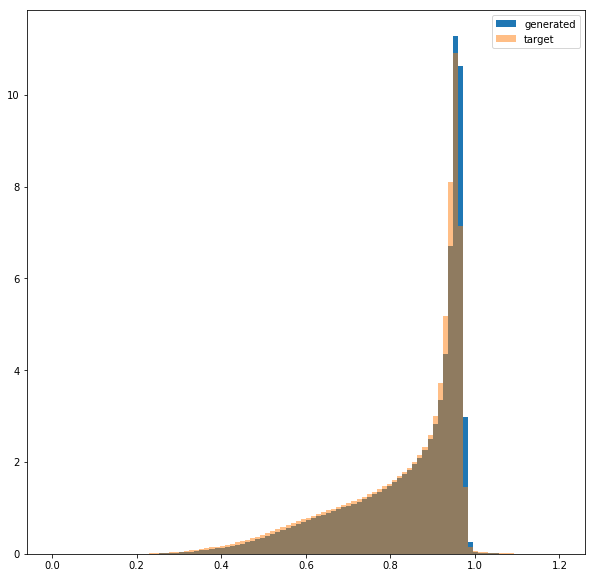

In [9]:
plotting.plot_hists(data_x.values,mc_x.values,bins=100,range=[0,1.2])

In [10]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler, QuantileTransformer
scaler_x = QuantileTransformer(output_distribution='normal')
# scaler_mc = QuantileTransformer(output_distribution='normal')

scaler_c = QuantileTransformer(output_distribution='normal')

mc_x = scaler_x.fit_transform(mc_x).reshape(-1,1,len(x_names))
data_x = scaler_x.transform(data_x).reshape(-1,1,len(x_names))

mc_c = scaler_c.fit_transform(mc_c).reshape(-1,1,len(c_names))
data_c = scaler_c.transform(data_c).reshape(-1,1,len(c_names))


In [11]:
data_x.shape,mc_x.shape

((17520217, 1, 1), (9616192, 1, 1))

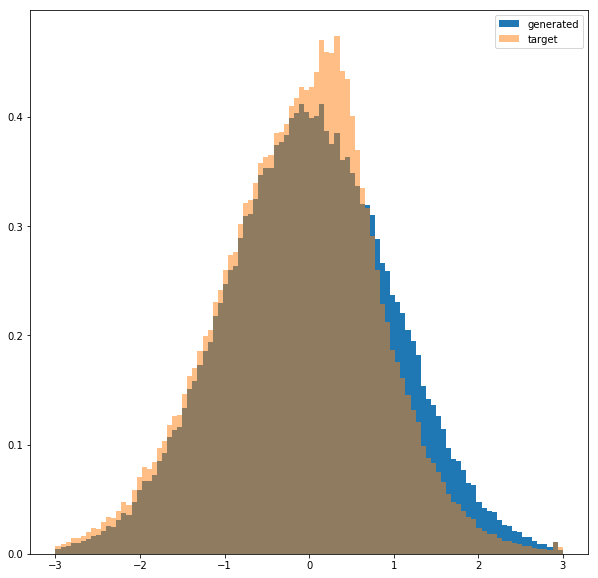

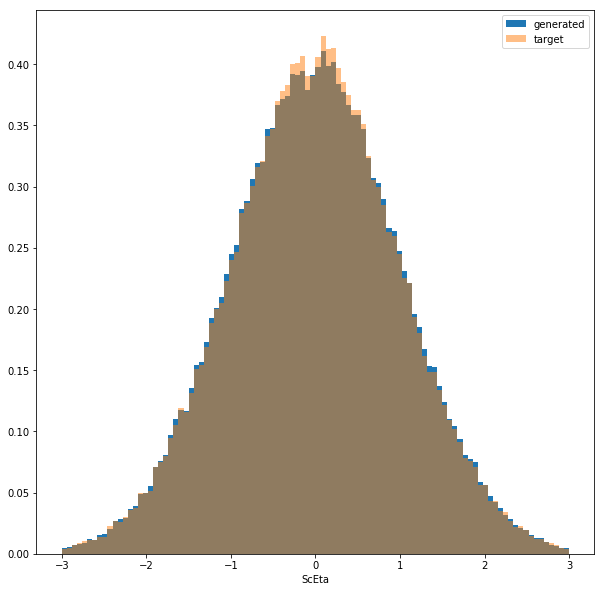

In [12]:
plotting.plot_hists(data_x[:,0,0],mc_x[:,0,0],bins=100,range=[-3,3])
plt.show()

plotting.plot_hists(data_c[:,0,0],mc_c[:,0,0],bins=100,range=[-3,3])
plt.xlabel(c_names[0])
plt.show()

# plotting.plot_hists(data_c[:,0,1],mc_c[:,0,1],bins=100,range=[-3,3])
# plt.xlabel(c_names[1])
# plt.show()


In [13]:
reload(models)

gan = models.MyFFGAN( (1,1), (1,1), c_shape=(1,1),
                     g_opts=dict(name="G_32x3_64x3_128x3",kernel_sizes=[128]*3+[64]*3+[32]*3,#kernel_sizes=[128]*11,
#                                 do_nl_activ=[False,"tanh"]*3+[False],
#                                 do_poly=True,
#                                 do_nl_activ="relu",do_skip=False, do_bn=True
                                ),
                     d_opts=dict(name="D_512x5_tanh",kernel_sizes=[512]*5),
#                     dm_opts=dict(optimizer=models.Adam,opt_kwargs=dict(lr=1e-5)),
#                     am_opts=dict(optimizer=models.Adam,opt_kwargs=dict(lr=1e-5)),
                      dm_opts=dict(optimizer=models.RMSprop,opt_kwargs=dict(lr=0.001, decay=6e-6)),
                      am_opts=dict(optimizer=models.RMSprop,opt_kwargs=dict(lr=0.001, decay=6e-6)),

                    )

In [14]:
gan.get_generator()

(1, 1)


In [15]:
gan.get_discriminator()

In [16]:
gan.compile()

(<keras.engine.training.Model at 0x2b580a4e42b0>,
 <keras.engine.training.Model at 0x2b580a6ff1d0>)

In [17]:
gan.get_generator().summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
G_32x3_64x3_128x3_c_input (Input (None, 1, 1)          0                                            
____________________________________________________________________________________________________
G_32x3_64x3_128x3_input (InputLa (None, 1, 1)          0                                            
____________________________________________________________________________________________________
G_32x3_64x3_128x3_all_inputs (Co (None, 1, 2)          0           G_32x3_64x3_128x3_c_input[0][0]  
                                                                   G_32x3_64x3_128x3_input[0][0]    
____________________________________________________________________________________________________
G_32x3_64x3_128x3_up1_dense (Den (None, 1, 32)         96          G_32x3_64x3_128x3_all_in

In [18]:
gan.get_discriminator().summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
D_512x5_tanh_c_input (InputLayer (None, 1, 1)          0                                            
____________________________________________________________________________________________________
D_512x5_tanh_input (InputLayer)  (None, 1, 1)          0                                            
____________________________________________________________________________________________________
D_512x5_tanh_all_inputs (Concate (None, 1, 2)          0           D_512x5_tanh_c_input[0][0]       
                                                                   D_512x5_tanh_input[0][0]         
____________________________________________________________________________________________________
D_512x5_tanh_down1_dense (Dense) (None, 1, 512)        1536        D_512x5_tanh_all_inputs[

In [19]:
gan.am.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
G_32x3_64x3_128x3_c_input (Input (None, 1, 1)          0                                            
____________________________________________________________________________________________________
G_32x3_64x3_128x3_input (InputLa (None, 1, 1)          0                                            
____________________________________________________________________________________________________
G_32x3_64x3_128x3_all_inputs (Co (None, 1, 2)          0           G_32x3_64x3_128x3_c_input[0][0]  
                                                                   G_32x3_64x3_128x3_input[0][0]    
____________________________________________________________________________________________________
G_32x3_64x3_128x3_up1_dense (Den (None, 1, 32)         96          G_32x3_64x3_128x3_all_in

In [20]:
gan.dm.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
D_512x5_tanh_c_input (InputLayer (None, 1, 1)          0                                            
____________________________________________________________________________________________________
D_512x5_tanh_input (InputLayer)  (None, 1, 1)          0                                            
____________________________________________________________________________________________________
D_512x5_tanh_all_inputs (Concate (None, 1, 2)          0           D_512x5_tanh_c_input[0][0]       
                                                                   D_512x5_tanh_input[0][0]         
____________________________________________________________________________________________________
D_512x5_tanh_down1_dense (Dense) (None, 1, 512)        1536        D_512x5_tanh_all_inputs[

In [21]:
# import toy_datasets as toys

In [22]:
# reload(toys)

# x_train,x_test,z_train,z_test = toys.two_peaks(100000) 

In [23]:
# plotting.plot_hists(x_train.ravel(),z_train.ravel())

In [24]:
# reload(toys)

# x,z = toys.three_peaks(100000)

# plotting.plot_hists(x.ravel(),z.ravel())

In [25]:
nmax = min(data_x.shape[0]//10,mc_x.shape[0])

data_x_train,data_x_test,data_c_train,data_c_test = cms.train_test_split(data_x[:nmax],data_c[:nmax])
mc_x_train,mc_x_test,mc_c_train,mc_c_test = cms.train_test_split(mc_x[:nmax],mc_c[:nmax])

In [ ]:
print(nmax)

1752021


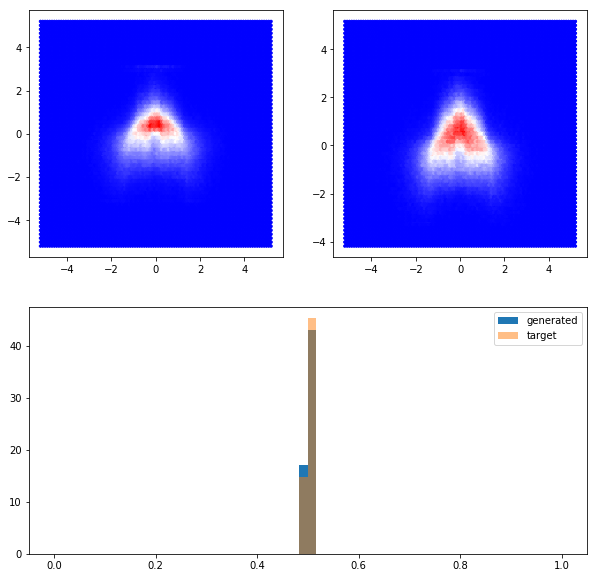

0: D [0.693327 0.488037] A: [0.726833 0.464844]
0: D [0.693033 0.511963] A: [0.692841 0.456299]


In [ ]:
do = dict(
    x_train=data_x_train,
    z_train=mc_x_train,
    c_x_train=data_c_train,
    c_z_train=mc_c_train,
          
    x_test=data_x_test,
    z_test=mc_x_test,
    c_x_test=data_c_test,
    c_z_test=mc_c_test,
    
    n_disc_steps=1,n_gen_steps=1,
    n_epochs=20,solution=None,plot_every=5,batch_size=4096)

gan.fit(**do)

# do.update(dict(n_disc_steps=2))
# gan.fit(**do)

# do.update(dict(n_disc_steps=3))
# gan.fit(**do)

# do.update(dict(n_disc_steps=5))
# gan.fit(**do)

In [ ]:
# # c0 = np.random.uniform(-1,1,x.shape)+np.random.normal(0,0.1,x.shape)
# # c0 -= c0.mean()
# # c0 /= c0.std()

# z = toys.white_source(x.shape[0])
# # z,_ = toys.two_peaks(x.shape[0],split=False)


# g_train = gan.get_generator().predict( [c_train,z] )[1]
# # g_test = gan.get_generator().predict( [c_test,z_test] )[1]
# # g_test_unique = np.unique(g_test)
# # z_test_unique = np.unique(z_test)
# # g_test.sort()
# # z_test_unique.sort()

In [ ]:
# g_quantiles = np.percentile(g,probs_test)
# x_quantiles = np.percentile(x_train,probs_test)

In [ ]:
# plt.scatter(z_test_unique,g_quantiles-z_test_unique)
# plt.scatter(z_test_unique,g_test_unique-z_test_unique)
# plt.scatter(z_test_unique,x_quantiles-z_test_unique,color='red')

In [ ]:
# plt.scatter(z_test,g_test-z_test)
# plt.scatter(z_test,x_test-z_test,color='red')

In [ ]:
# g_quantiles - g_test

In [ ]:
# target = np.hstack( [c_train.reshape(-1,1), x_train.reshape(-1,1)] )
# generated = np.hstack( [c_train.reshape(-1,1), g_train.reshape(-1,1)] )


In [ ]:
# plt.hexbin( c_train.ravel(), x_train.ravel() )
# plt.show()

# plt.hexbin( c_train.ravel(), g_train.ravel() )
# plt.show()


In [ ]:
# probs2 = [0,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]
# c_quantiles = np.percentile(np.vstack([generated[:,0],target[:,0]]),probs2)

# print(c_quantiles)

In [ ]:
# plotting.plot_hists(target[:,1],generated[:,1])
# plt.show()

# for iqt in range(c_quantiles.shape[0]-1):
#     q0 = c_quantiles[iqt]
#     q1 = c_quantiles[iqt+1]
#     target_slice = target[:,1][(target[:,0]>q0) & (target[:,0]<=q1)] 
#     generated_slice = generated[:,1][(generated[:,0]>q0) & (generated[:,0]<=q1)]
    
#     print(q0, q1, target_slice.sum(), generated_slice.sum() )
#     #target_q = np.percentile( [ target_slice ] , probs2  )
#     #generated_q = np.percentile( [ generated_slice ], probs2  )
    
#     #plt.plot(target_q,generated_q-target_q,label='%d' % probs2[iqt+1])

#     plotting.plot_hists(target_slice,generated_slice)
#     plt.show()
# #plt.legend()
# #plt.show()

In [ ]:
# gan.am.output

In [ ]:
# import plotting

In [ ]:
reload(plotting)

mc_x_morphed = gan.get_generator().predict([mc_c_test,mc_x_test])[1]

data_p = gan.get_discriminator().predict([data_c_test,data_x_test])
mc_p   = gan.get_discriminator().predict([mc_c_test,mc_x_morphed])

data_quantiles = np.percentile(data_c_test,[5,10,20,])

plotting.plot_summary_cond(data_x_test,data_c_test,mc_x_morphed,mc_c_test,mc_x_test,data_p,mc_p)
plotting.plot_summary_cond(data_x_test,data_c_test,mc_x_morphed,mc_c_test,mc_x_test,data_p,mc_p,do_slices=True)

In [ ]:
print(data_c_test.shape,data_x_test.shape)